In [10]:
"""
## Title: Analyzing the Impact of Gender Integration: A Case Study of Falcon College

## Introduction:
I had the privilege of being one of the "12 pioneers" of Falcon College, Zimbabwe in 2017 as one of the first 12 girls 
to join the previously all-male boarding school. Since then, the number of female students at Falcon College has grown 
significantly, and I am eager to explore and understand the transformative impact that the introduction of girls has had on
the school over the years.

The dataset for this analysis comprises of multiple components, including enrolment data, age group data, pass rates data, 
and forms data. The enrolment data provides information about the total number of students enrolled in the school each year, 
categorized by gender. The age group data offers insights into the distribution of students across different age groups (where 
learners turned the age in that group in that year e.g. U14 in 2014 means that the student turned 14 in 2014)
The pass rates data sheds light on the academic performance of students, indicating the percentage of students who pass their
exams. Lastly, the forms data provides details about the different grade levels in the school.

The primary objective of this analysis is to examine the changes in enrolment trends and academic performance before and after 
the introduction of girls to Falcon College. By comparing the data before and after this pivotal milestone, we aim to assess the
impact of gender integration on the school community. Additionally, we seek to uncover any patterns or trends in the age group
distribution and the pass rates of students, which may offer valuable insights into the educational landscape at Falcon College.

By employing various data analysis techniques, including data visualization,and statistical analysis using Python, hypothesis 
testing, and testing for normality using R programming, we aim to uncover meaningful findings that can inform school administrators and
policymakers about the effects of gender integration on enrolment and academic outcomes. This research is not only significant
for Falcon College but also holds broader implications for educational institutions, highlighting the potential benefits of 
creating more inclusive and diverse learning environments

The analysis will cover data from 2011 to 2023, providing a comprehensive overview of the changes and developments that have 
taken place since the integration of girls into Falcon College.
Through this exploration, we hope to gain a deeper understanding of the impact of gender integration and contribute to the 
ongoing conversation on educational equity and inclusivity.

"""

'\n## Title: Analyzing the Impact of Gender Integration: A Case Study of Falcon College\n\n## Introduction:\nI had the privilege of being one of the "12 pioneers" of Falcon College, Zimbabwe in 2017 as one of the first 12 girls \nto join the previously all-male boarding school. Since then, the number of female students at Falcon College has grown \nsignificantly, and I am eager to explore and understand the transformative impact that the introduction of girls has had on\nthe school over the years.\n\nThe dataset for this analysis comprises of multiple components, including enrolment data, age group data, pass rates data, \nand forms data. The enrolment data provides information about the total number of students enrolled in the school each year, \ncategorized by gender. The age group data offers insights into the distribution of students across different age groups (where \nlearners turned the age in that group in that year e.g. U14 in 2014 means that the student turned 14 in 2014)\nTh

In [3]:
# Importing the necessary libraries 
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization

from ipywidgets import interact  # For interactivity

import scipy.stats as stats  # For statistical analysis
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.metrics import mean_squared_error  # For evaluating the model's performance


In [8]:
# Read the enrolment dataset from the specified file path
enrolment = pd.read_csv("C:/Users/Olidia/Desktop/Projects/Falcon/Enrolment.csv")

# Display the first 10 rows of the enrolment dataframe
enrolment.head(10)

,ENROLMENT SINCE 2011,Unnamed: 1,Unnamed: 2
0,,Male,Female
1,2011,418,0
2,2012,441,0
3,2013,433,0
4,2014,439,0
5,2015,423,0
6,2016,396,0
7,2017,370,13
8,2018,347,33
9,2019,363,62


In [9]:
#information about dataset
enrolment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ENROLMENT SINCE 2011  14 non-null     object
 1   Unnamed: 1            14 non-null     object
 2   Unnamed: 2            14 non-null     object
dtypes: object(3)
memory usage: 464.0+ bytes


In [32]:
#basic statistics about dataset
enrolment.describe()

,ENROLMENT SINCE 2011,Unnamed: 1,Unnamed: 2
count,14,14,14
unique,14,14,9
top,2011,352,0
freq,1,1,6


In [10]:
# Reset the index
enrolment = enrolment.reset_index(drop=True)

# Drop first row
enrolment = enrolment.drop(index=0)

# Assign column names
enrolment.columns = ['Year', 'Male', 'Female']

# Convert the data type of 'Male' and 'Female' columns to numeric
enrolment['Male'] = pd.to_numeric(enrolment['Male'])
enrolment['Female'] = pd.to_numeric(enrolment['Female'])

# Calculate the total enrollments (male + female) for each year
enrolment['Total_Enrolment'] = enrolment['Male'] + enrolment['Female']

# Print the enrollment by year
print(enrolment)

    Year  Male  Female  Total_Enrolment
1   2011   418       0              418
2   2012   441       0              441
3   2013   433       0              433
4   2014   439       0              439
5   2015   423       0              423
6   2016   396       0              396
7   2017   370      13              383
8   2018   347      33              380
9   2019   363      62              425
10  2020   354      91              445
11  2021   364     120              484
12  2022   374     136              510
13  2023   352     148              500


In [16]:
# Calculate the percentage of male and female enrollments for each year
enrolment['Male_Percentage'] = (enrolment['Male'] / enrolment['Total_Enrolment']) * 100
enrolment['Female_Percentage'] = (enrolment['Female'] / enrolment['Total_Enrolment']) * 100

# Calculate the year-to-year growth rates for male and female enrollments
enrolment['Male_Growth_Rate'] = enrolment['Male'].pct_change() * 100
enrolment['Female_Growth_Rate'] = enrolment['Female'].pct_change() * 100

print(enrolment)

    Year  Male  Female  Total_Enrolment  Male_Percentage  Female_Percentage  \
1   2012   441       0              441       100.000000           0.000000   
2   2013   433       0              433       100.000000           0.000000   
3   2014   439       0              439       100.000000           0.000000   
4   2015   423       0              423       100.000000           0.000000   
5   2016   396       0              396       100.000000           0.000000   
6   2017   370      13              383        96.605744           3.394256   
7   2018   347      33              380        91.315789           8.684211   
8   2019   363      62              425        85.411765          14.588235   
9   2020   354      91              445        79.550562          20.449438   
10  2021   364     120              484        75.206612          24.793388   
11  2022   374     136              510        73.333333          26.666667   
12  2023   352     148              500        70.40

In [17]:
"""
- Prior to 2017, the school had a male-only enrollment, with no female students.
- In 2017, the first year of female integration, 13 female students were enrolled, accounting for 3.39% of the total enrolment.
- The total enrolment steadily increased over the years, reaching a peak of 510 in 2022.
- The male enrolment experienced a slight decline from 418 in 2011 to 352 in 2023, with a corresponding decrease in the male growth rate.
- On the other hand, the female enrolment grew steadily from 13 in 2017 to 148 in 2023, indicating a significant increase in the
  female presence at the school.
- The male percentage gradually decreased from 100% in the pre-integration years to 70.40% in 2023, while the female percentage 
  rose to 29.60%.
- The growth rate of female enrolment has been consistently positive, whereas the male growth rate has fluctuated over the years.
- These findings suggest a successful integration of female students into Falcon College and a more balanced gender distribution
  at the school.
"""

'\n- Prior to 2017, the school had a male-only enrollment, with no female students.\n- In 2017, the first year of female integration, 13 female students were enrolled, accounting for 3.39% of the total enrolment.\n- The total enrolment steadily increased over the years, reaching a peak of 510 in 2022.\n- The male enrolment experienced a slight decline from 418 in 2011 to 352 in 2023, with a corresponding decrease in the male growth rate.\n- On the other hand, the female enrolment grew steadily from 13 in 2017 to 148 in 2023, indicating a significant increase in the\n  female presence at the school.\n- The male percentage gradually decreased from 100% in the pre-integration years to 70.40% in 2023, while the female percentage \n  rose to 29.60%.\n- The growth rate of female enrolment has been consistently positive, whereas the male growth rate has fluctuated over the years.\n- These findings suggest a successful integration of female students into Falcon College and a more balanced gend

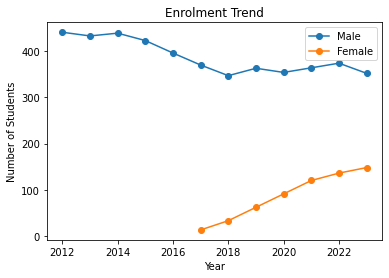

In [18]:
# Visualizing the growth of male students and the trend of female students starting from the year 2017

# To filter the data based on the year, we need to convert the 'Year' column to numeric data type before applying the comparison
enrolment['Year'] = pd.to_numeric(enrolment['Year'], errors='coerce')

# Create a line plot for male enrollments
plt.plot(enrolment['Year'], enrolment['Male'], marker='o', label='Male')

# Filter the data starting from the year 2017
enrolment_filtered = enrolment[enrolment['Year'] >= 2017]

# Create a line plot for female enrollments
plt.plot(enrolment_filtered['Year'], enrolment_filtered['Female'], marker='o', label='Female')

# Set plot title and labels
plt.title('Enrolment Trend')
plt.xlabel('Year')
plt.ylabel('Number of Students')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [19]:
"""
From the line plot illustrating the enrolment trend, the following observations can be made:

Male Enrolment: The number of male students shows a gradual decline from 2011 to 2018, reaching a low point in 2018.
However, from 2018 onwards, there is a slight recovery in male enrolments, although the numbers remain lower compared to 
previous years.

Female Enrolment: The trend for female students displays a different pattern. From 2017, there is a significant increase in
female enrolments, indicating a positive growth trend. The number of female students continues to rise steadily each year.

Gender Distribution: The percentage of male enrolments has declined over the years, while the percentage of female enrolments
has been consistently increasing. This indicates a shift in the gender distribution within the student population.

These findings highlight the changing enrolment patterns and the increasing representation of female students in recent years.
"""

'\nFrom the line plot illustrating the enrolment trend, the following observations can be made:\n\nMale Enrolment: The number of male students shows a gradual decline from 2011 to 2018, reaching a low point in 2018.\nHowever, from 2018 onwards, there is a slight recovery in male enrolments, although the numbers remain lower compared to \nprevious years.\n\nFemale Enrolment: The trend for female students displays a different pattern. From 2017, there is a significant increase in\nfemale enrolments, indicating a positive growth trend. The number of female students continues to rise steadily each year.\n\nGender Distribution: The percentage of male enrolments has declined over the years, while the percentage of female enrolments\nhas been consistently increasing. This indicates a shift in the gender distribution within the student population.\n\nThese findings highlight the changing enrolment patterns and the increasing representation of female students in recent years.\n'

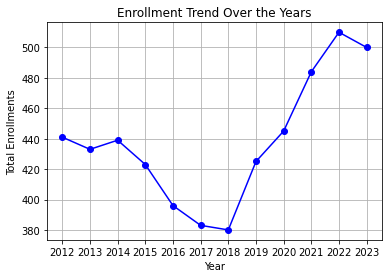

In [20]:
# Plotting the line graph for total enrollments
plt.plot(enrolment['Year'], enrolment['Total_Enrolment'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Enrollments')
plt.title('Enrollment Trend Over the Years')

# Customize the plot
plt.grid(True)

# Set x-axis ticks
plt.xticks(enrolment['Year'])

# Display the plot
plt.show()

In [21]:
"""
Findings:

Enrolment Trend: The graph shows a fluctuating pattern in total enrolments from 2011 to 2023. 
Initially, there is a decrease in total enrollments from 2011 to 2018.
From 2018 onwards, there is a recovery in total enrolments, and the numbers start to increase. 
This indicates a period of growth in total enrollments.

Peak in 2022: The graph shows a peak in total enrollments in 2022, reaching the highest point in the observed period.

Fluctuations: Throughout the graph, there are fluctuations in total enrollments, suggesting variations in student demand or 
external factors influencing enrolment patterns.

Despite the initial decline, the overall trend indicates a positive growth in total enrollments from 2018 to 2023.
"""

'\nFindings:\n\nEnrolment Trend: The graph shows a fluctuating pattern in total enrolments from 2011 to 2023. \nInitially, there is a decrease in total enrollments from 2011 to 2018.\nFrom 2018 onwards, there is a recovery in total enrolments, and the numbers start to increase. \nThis indicates a period of growth in total enrollments.\n\nPeak in 2022: The graph shows a peak in total enrollments in 2022, reaching the highest point in the observed period.\n\nFluctuations: Throughout the graph, there are fluctuations in total enrollments, suggesting variations in student demand or \nexternal factors influencing enrolment patterns.\n\nDespite the initial decline, the overall trend indicates a positive growth in total enrollments from 2018 to 2023.\n'

In [22]:
# Age Group Analysis
# Learners turned the age in that group in that year e.g. U14 in 2014 means that the student turned 14 in 2014

age_group = pd.read_csv("C:/Users/Olidia/Desktop/Projects/Falcon/AgeGroup.csv")
age_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    13 non-null     int64
 1   U12     13 non-null     int64
 2   U13     13 non-null     int64
 3   U14     13 non-null     int64
 4   U15     13 non-null     int64
 5   U16     13 non-null     int64
 6   U17     13 non-null     int64
 7   U18     13 non-null     int64
 8   U19     13 non-null     int64
 9   U20     13 non-null     int64
 10  OPEN    13 non-null     int64
 11  Total   13 non-null     int64
dtypes: int64(12)
memory usage: 1.3 KB


In [23]:
age_group.head(15)

,Year,U12,U13,U14,U15,U16,U17,U18,U19,U20,OPEN,Total
0,2011,0,58,68,75,77,76,48,15,1,0,418
1,2012,0,66,76,66,73,74,75,10,1,0,441
2,2013,1,55,86,76,65,72,66,12,0,0,433
3,2014,0,57,77,85,74,65,61,19,1,0,439
4,2015,0,48,68,75,80,73,60,17,2,0,423
5,2016,1,36,65,69,69,76,64,15,1,0,396
6,2017,0,42,53,65,69,64,73,17,0,0,383
7,2018,0,57,55,58,62,74,54,19,1,0,380
8,2019,2,67,78,64,61,60,71,21,1,0,425
9,2020,0,79,86,85,62,61,53,18,1,0,445


In [24]:
# Comparing the trends and changes in the enrollment numbers before and after 2017
# Filter the age_group dataset for years after 2017
age_group_filtered = age_group[age_group['Year'] >= 2017]

# Display the filtered dataset
age_group_filtered.head()

,Year,U12,U13,U14,U15,U16,U17,U18,U19,U20,OPEN,Total
6,2017,0,42,53,65,69,64,73,17,0,0,383
7,2018,0,57,55,58,62,74,54,19,1,0,380
8,2019,2,67,78,64,61,60,71,21,1,0,425
9,2020,0,79,86,85,62,61,53,18,1,0,445
10,2021,1,75,107,85,76,67,58,13,2,0,484


In [25]:
# Identifying the age group(s) that experienced the most significant changes 
# Exclude the 'Year' column from the calculation
total_students_after_2017 = age_group_filtered.drop(['Year', 'Total'], axis=1).sum()

# Find the age group(s) with the highest increase in student count
age_group_with_highest_increase = total_students_after_2017.idxmax()

# Print the age group(s) with the highest increase in student count after 2017
print("Age group(s) with the highest increase in student count after 2017:", age_group_with_highest_increase)


Age group(s) with the highest increase in student count after 2017: U14


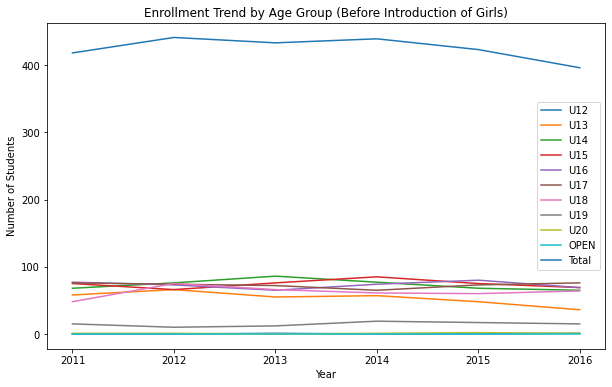

In [26]:
# Assessing the overall trend in enrollment changes across all age groups to understand the general pattern, before introduction of girl
# Filter the age_group dataset for years before 2017
before_girls = age_group[age_group['Year'] < 2017]

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over each age group column
for column in before_girls.columns[1:]:
    # Plot the line graph for the specific age group
    plt.plot(before_girls['Year'], before_girls[column], label=column)

# Set the title and labels for the axes
plt.title('Enrollment Trend by Age Group (Before Introduction of Girls)')
plt.xlabel('Year')
plt.ylabel('Number of Students')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [27]:
"""
Findings:

Overall Enrollment Trend: The graph showcases fluctuations in enrollment numbers across different age groups before the 
introduction of girls.

Variation among Age Groups: Each age group exhibits a distinct enrollment pattern.
Younger age groups, such as U12 and U13, demonstrate relatively stable enrollments over the years. 
In contrast, older age groups (U14 to U20) and the OPEN category display more variability in enrollments.

Gradual Decline in Older Age Groups: The enrollment numbers for the older age groups (U14 to U20) show a gradual decline over
time. This suggests a decreasing trend in enrollments for these age groups.

Stability in Younger Age Groups: In contrast, the enrollments for U12 and U13 remain relatively stable throughout the observed 
years, indicating consistent student enrollment in these age groups.

Fluctuations in Enrollment: Some age groups, such as U14 to U20 and OPEN, experience fluctuations in enrollments with noticeable
peaks and dips over the years.

"""

'\nFindings:\n\nOverall Enrollment Trend: The graph showcases fluctuations in enrollment numbers across different age groups before the \nintroduction of girls.\n\nVariation among Age Groups: Each age group exhibits a distinct enrollment pattern.\nYounger age groups, such as U12 and U13, demonstrate relatively stable enrollments over the years. \nIn contrast, older age groups (U14 to U20) and the OPEN category display more variability in enrollments.\n\nGradual Decline in Older Age Groups: The enrollment numbers for the older age groups (U14 to U20) show a gradual decline over\ntime. This suggests a decreasing trend in enrollments for these age groups.\n\nStability in Younger Age Groups: In contrast, the enrollments for U12 and U13 remain relatively stable throughout the observed \nyears, indicating consistent student enrollment in these age groups.\n\nFluctuations in Enrollment: Some age groups, such as U14 to U20 and OPEN, experience fluctuations in enrollments with noticeable\npeaks

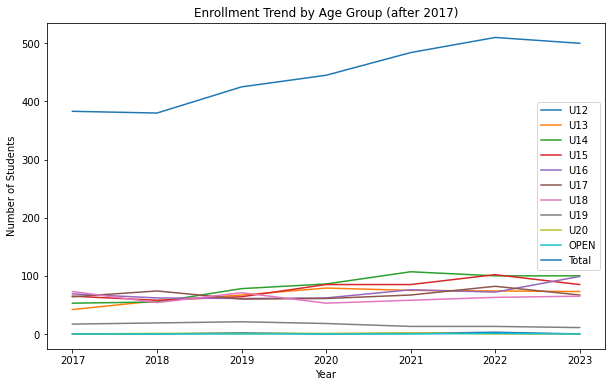

In [28]:
# Assessing the overall trend in enrollment changes across all age groups to understand the general pattern, after introduction of girl
# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over each age group column
for column in age_group_filtered.columns[1:]:
    # Plot the line graph for the specific age group
    plt.plot(age_group_filtered['Year'], age_group_filtered[column], label=column)

# Set the title and labels for the axes
plt.title('Enrollment Trend by Age Group (after 2017)')
plt.xlabel('Year')
plt.ylabel('Number of Students')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [29]:
"""
Findings:

Overall Enrollment Trend: The graph represents the trend of enrollment changes across different age groups after the 
introduction of girls.

Increase in U14 Enrollment: Among the age groups, U14 stands out with the highest increase in student count after 2017. 
This indicates a significant impact of the introduction of girls on the enrollment of this age group.

Varied Enrollment Patterns: Other age groups also demonstrate changes in enrollment, albeit to a lesser extent. 
It suggests a positive overall trend in enrollment across multiple age groups.

Implication of Gender Inclusion: The introduction of girls appears to have contributed to a more diverse and inclusive 
participation in the program, as indicated by the increase in enrollment numbers across various age groups.
"""

'\nFindings:\n\nOverall Enrollment Trend: The graph represents the trend of enrollment changes across different age groups after the \nintroduction of girls.\n\nIncrease in U14 Enrollment: Among the age groups, U14 stands out with the highest increase in student count after 2017. \nThis indicates a significant impact of the introduction of girls on the enrollment of this age group.\n\nVaried Enrollment Patterns: Other age groups also demonstrate changes in enrollment, albeit to a lesser extent. \nIt suggests a positive overall trend in enrollment across multiple age groups.\n\nImplication of Gender Inclusion: The introduction of girls appears to have contributed to a more diverse and inclusive \nparticipation in the program, as indicated by the increase in enrollment numbers across various age groups.\n'

In [18]:
forms = pd.read_csv("C:/Users/Olidia/Desktop/Projects/Falcon/Forms.csv")
pass_rates = pd.read_csv("C:/Users/Olidia/Desktop/Projects/Falcon/PassRates.csv")

forms.info()
pass_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14 non-null     object
 1   L6          14 non-null     object
 2   Unnamed: 2  14 non-null     object
 3   U6          14 non-null     object
 4   Unnamed: 4  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SUBJECT PASS RATES %  13 non-null     object
 1   Unnamed: 1            13 non-null     object
 2   Unnamed: 2            13 non-null     object
 3   Unnamed: 3            13 non-null     object
dtypes: object(4)
memory usage: 544.0+ bytes


In [19]:
forms = forms.rename(columns={'Unnamed: 0': 'Year', 'L6': 'L6_Male', 'Unnamed: 2': 'L6_Female', 'U6': 'U6_Male', 'Unnamed: 4': 'U6_Female'})
forms = forms.drop(0)
forms.head(10)

,Year,L6_Male,L6_Female,U6_Male,U6_Female
1,2011,80,0,44,0
2,2012,65,0,64,0
3,2013,72,0,48,0
4,2014,72,0,54,0
5,2015,59,0,61,0
6,2016,71,0,56,0
7,2017,59,2,64,2
8,2018,64,5,46,2
9,2019,51,7,58,6
10,2020,56,7,41,6


In [20]:
pass_rates = pass_rates.rename(columns={'SUBJECT PASS RATES %': 'Year', 'Unnamed: 1': 'IGCSE', 'Unnamed: 2': 'AS', 'Unnamed: 3': 'A Level'})
pass_rates = pass_rates.drop(0)
pass_rates.head(10)

,Year,IGCSE,AS,A Level
1,2011,79,79,88
2,2012,83,83,89
3,2013,86,80,86
4,2014,78,88,93
5,2015,80,80,93
6,2016,78,80,87
7,2017,77,75,95
8,2018,71,81,92
9,2019,80,79,88
10,2020,76,83,96


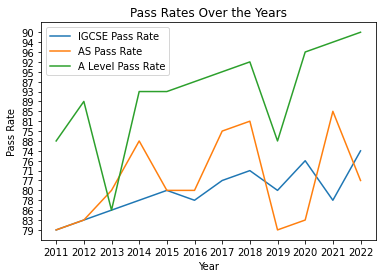

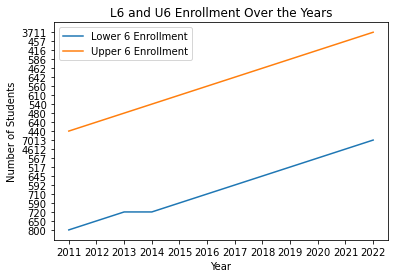

In [21]:
# Merge the "forms" and "pass_rates" DataFrames based on the "Year" column
merged_data = forms.merge(pass_rates, on ='Year')

merged_data['Total_L6'] = merged_data['L6_Male'] + merged_data['L6_Female']
merged_data['Total_U6'] = merged_data['U6_Male'] + merged_data['U6_Female']

plt.plot(merged_data['Year'], merged_data['IGCSE'], label ='IGCSE Pass Rate')
plt.plot(merged_data['Year'], merged_data['AS'], label ='AS Pass Rate')
plt.plot(merged_data['Year'], merged_data['A Level'], label ='A Level Pass Rate')
plt.xlabel('Year')
plt.ylabel('Pass Rate')
plt.title('Pass Rates Over the Years')
plt.legend()
plt.show()

plt.plot(merged_data['Year'], merged_data['Total_L6'], label ='Lower 6 Enrollment')
plt.plot(merged_data['Year'], merged_data['Total_U6'], label ='Upper 6 Enrollment')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('L6 and U6 Enrollment Over the Years')
plt.legend()
plt.show()

In [22]:
"""
Findings:
The first graph illustrates the pass rates for different levels of examinations (IGCSE, AS, and A Level) over the years.

Pass Rates: The pass rates for IGCSE, AS, and A Level exams show relatively consistent performance. 
A Level exams consistently show the highest pass rates among the three levels.
Although the pass rates remain relatively stable, there are minor fluctuations observed.

The second graph showcases the enrollment trends for Lower 6 (L6) and Upper 6 (U6) students over the years.

L6 Enrollment: The number of students enrolled in L6 remains relatively stable, with minor fluctuations observed over the years. The L6 enrollment ranges from 46 to 80 students, indicating a consistent intake of students in this phase of education.

U6 Enrollment: U6 enrollment also shows some fluctuations but maintains a relatively steady trend. 

Gender Distribution: The graph does not provide a clear distinction in enrollment between male and female students.
However, it can be inferred that both male and female students are represented in the L6 and U6 enrollment figures.
The introduction of girls in 2017 is reflected in the enrollment numbers, with a slight increase in both male and female
students in L6 and U6 from that point onwards.

Overall, the data indicates consistent pass rates across different examination levels over the years, with minor fluctuations.
Additionally, the enrollment numbers for L6 and U6 students remain relatively stable, indicating a consistent intake of students in these phases of education.
"""

'\nFindings:\nThe first graph illustrates the pass rates for different levels of examinations (IGCSE, AS, and A Level) over the years.\n\nPass Rates: The pass rates for IGCSE, AS, and A Level exams show relatively consistent performance. \nA Level exams consistently show the highest pass rates among the three levels.\nAlthough the pass rates remain relatively stable, there are minor fluctuations observed.\n\nThe second graph showcases the enrollment trends for Lower 6 (L6) and Upper 6 (U6) students over the years.\n\nL6 Enrollment: The number of students enrolled in L6 remains relatively stable, with minor fluctuations observed over the years. The L6 enrollment ranges from 46 to 80 students, indicating a consistent intake of students in this phase of education.\n\nU6 Enrollment: U6 enrollment also shows some fluctuations but maintains a relatively steady trend. \n\nGender Distribution: The graph does not provide a clear distinction in enrollment between male and female students.\nHowev

In [30]:
# Convert columns to numeric data types
merged_data['L6_Male'] = pd.to_numeric(merged_data['L6_Male'])
merged_data['L6_Female'] = pd.to_numeric(merged_data['L6_Female'])
merged_data['U6_Male'] = pd.to_numeric(merged_data['U6_Male'])
merged_data['U6_Female'] = pd.to_numeric(merged_data['U6_Female'])
merged_data['Total_L6'] = pd.to_numeric(merged_data['Total_L6'])
merged_data['Total_U6'] = pd.to_numeric(merged_data['Total_U6'])
merged_data['A Level'] = pd.to_numeric(merged_data['A Level'])
merged_data['AS'] = pd.to_numeric(merged_data['AS'])

# Calculate pass rates for Lower 6 Male and Female
merged_data['PassRate_L6_Male'] = (merged_data['L6_Male'] / merged_data['Total_L6']) * merged_data['AS']
merged_data['PassRate_L6_Female'] = (merged_data['L6_Female'] / merged_data['Total_L6']) * merged_data['AS']

# Calculate pass rates for Upper 6 Male and Female
merged_data['PassRate_U6_Male'] = (merged_data['U6_Male'] / merged_data['Total_U6']) * merged_data['A Level']
merged_data['PassRate_U6_Female'] = (merged_data['U6_Female'] / merged_data['Total_U6']) * merged_data['A Level']


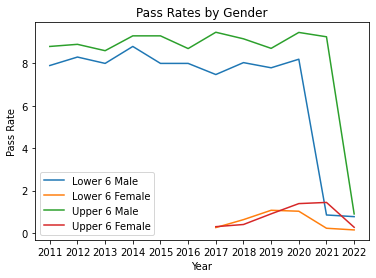

    Year  L6_Male  L6_Female  U6_Male  U6_Female IGCSE  AS  A Level  Total_L6  \
0   2011       80          0       44          0    79  79       88       800   
1   2012       65          0       64          0    83  83       89       650   
2   2013       72          0       48          0    86  80       86       720   
3   2014       72          0       54          0    78  88       93       720   
4   2015       59          0       61          0    80  80       93       590   
5   2016       71          0       56          0    78  80       87       710   
6   2017       59          2       64          2    77  75       95       592   
7   2018       64          5       46          2    71  81       92       645   
8   2019       51          7       58          6    80  79       88       517   
9   2020       56          7       41          6    76  83       96       567   
10  2021       46         12       45          7    78  85       94      4612   
11  2022       70         13

In [31]:
# Compare pass rates based on gender
# Filter the data for years before 2017
data_after_2017 = merged_data[merged_data['Year'] >= '2017']

plt.plot(merged_data['Year'], merged_data['PassRate_L6_Male'], label='Lower 6 Male')
plt.plot(data_after_2017['Year'],data_after_2017['PassRate_L6_Female'], label='Lower 6 Female')
plt.plot(merged_data['Year'], merged_data['PassRate_U6_Male'], label='Upper 6 Male')
plt.plot(data_after_2017['Year'], data_after_2017['PassRate_U6_Female'], label='Upper 6 Female')
plt.xlabel('Year')
plt.ylabel('Pass Rate')
plt.title('Pass Rates by Gender')
plt.legend()
plt.show()

print(merged_data)

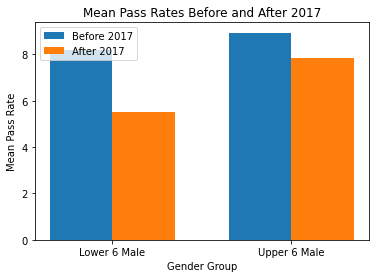

In [25]:
# Compare pass rates before and after 2017
pass_rate_before_2017 = merged_data[merged_data['Year'] < '2017']
pass_rate_after_2017 = merged_data[merged_data['Year'] >= '2017']

mean_pass_rate_before_L6_Male = pass_rate_before_2017['PassRate_L6_Male'].mean()
mean_pass_rate_before_U6_Male = pass_rate_before_2017['PassRate_U6_Male'].mean()

mean_pass_rate_after_L6_Male = pass_rate_after_2017['PassRate_L6_Male'].mean()
mean_pass_rate_after_U6_Male = pass_rate_after_2017['PassRate_U6_Male'].mean()

# Plot mean pass rates before and after 2017
categories = ['Lower 6 Male', 'Upper 6 Male']
mean_pass_rates_before = [mean_pass_rate_before_L6_Male, mean_pass_rate_before_U6_Male]
mean_pass_rates_after = [mean_pass_rate_after_L6_Male, mean_pass_rate_after_U6_Male]

width = 0.35  # Width of the bars
x = np.arange(len(categories))

plt.bar(x - width/2, mean_pass_rates_before, width, label='Before 2017')
plt.bar(x + width/2, mean_pass_rates_after, width, label='After 2017')
plt.xlabel('Gender Group')
plt.ylabel('Mean Pass Rate')
plt.title('Mean Pass Rates Before and After 2017')
plt.xticks(x, categories)
plt.legend()
plt.show()

In [81]:
#R
# Read the Forms.csv file
forms <- read.csv("C:/Users/Olidia/Desktop/Projects/Falcon/Forms.csv")

# Read the PassRates.csv file
pass_rates <- read.csv("C:/Users/Olidia/Desktop/Projects/Falcon/PassRates.csv")

# Rename columns in forms DataFrame
colnames(forms) <- c('Year', 'L6_Male', 'L6_Female', 'U6_Male', 'U6_Female')

# Drop the first row in forms DataFrame
forms <- forms[-1, ]

# Rename columns in pass_rates DataFrame
colnames(pass_rates) <- c('Year', 'IGCSE', 'AS', 'A_Level')

# Drop the first row in pass_rates DataFrame
pass_rates <- pass_rates[-1, ]

In [41]:
# Merge the "forms" and "pass_rates" DataFrames based on the "Year" column
merged_data <- merge(forms, pass_rates, by = 'Year')

# Convert columns to numeric data types
merged_data$L6_Male <- as.numeric(merged_data$L6_Male)
merged_data$L6_Female <- as.numeric(merged_data$L6_Female)
merged_data$U6_Male <- as.numeric(merged_data$U6_Male)
merged_data$U6_Female <- as.numeric(merged_data$U6_Female)

# Create the "Total_L6" and "Total_U6" columns by summing the male and female counts
merged_data$Total_L6 <- merged_data$L6_Male + merged_data$L6_Female
merged_data$Total_U6 <- merged_data$U6_Male + merged_data$U6_Female

# Print the merged data
print(merged_data)

   Year L6_Male L6_Female U6_Male U6_Female IGCSE AS A_Level Total_L6 Total_U6
1  2011      80         0      44         0    79 79      88       80       44
2  2012      65         0      64         0    83 83      89       65       64
3  2013      72         0      48         0    86 80      86       72       48
4  2014      72         0      54         0    78 88      93       72       54
5  2015      59         0      61         0    80 80      93       59       61
6  2016      71         0      56         0    78 80      87       71       56
7  2017      59         2      64         2    77 75      95       61       66
8  2018      64         5      46         2    71 81      92       69       48
9  2019      51         7      58         6    80 79      88       58       64
10 2020      56         7      41         6    76 83      96       63       47
11 2021      46        12      45         7    78 85      94       58       52
12 2022      70        13      37        11    74 77

In [57]:
# Convert columns to numeric data types
merged_data$Total_L6 <- as.numeric(merged_data$Total_L6)
merged_data$Total_U6 <- as.numeric(merged_data$Total_U6)
merged_data$A_Level <- as.numeric(merged_data$A_Level)
merged_data$AS <- as.numeric(merged_data$AS)

# Calculate pass rates
merged_data$PassRate_L6_Male <- (merged_data$L6_Male / merged_data$Total_L6) * merged_data$AS
merged_data$PassRate_U6_Male <- (merged_data$U6_Male / merged_data$Total_U6) * merged_data$A_Level

# Compare pass rates before and after 2017
pass_rate_before_2017 <- merged_data[merged_data$Year < 2017, ]
pass_rate_after_2017 <- merged_data[merged_data$Year >= 2017, ]

# Calculate the differences in pass rates
merged_data$diff_L6_Male <- pass_rate_after_2017$PassRate_L6_Male - pass_rate_before_2017$PassRate_L6_Male
merged_data$diff_U6_Male <- pass_rate_after_2017$PassRate_U6_Male - pass_rate_before_2017$PassRate_U6_Male

print(merged_data)


   Year L6_Male L6_Female U6_Male U6_Female IGCSE AS A_Level Total_L6 Total_U6
1  2011      80         0      44         0    79 79      88       80       44
2  2012      65         0      64         0    83 83      89       65       64
3  2013      72         0      48         0    86 80      86       72       48
4  2014      72         0      54         0    78 88      93       72       54
5  2015      59         0      61         0    80 80      93       59       61
6  2016      71         0      56         0    78 80      87       71       56
7  2017      59         2      64         2    77 75      95       61       66
8  2018      64         5      46         2    71 81      92       69       48
9  2019      51         7      58         6    80 79      88       58       64
10 2020      56         7      41         6    76 83      96       63       47
11 2021      46        12      45         7    78 85      94       58       52
12 2022      70        13      37        11    74 77

In [60]:
# Hypothesis test to determine if there is a significant difference in the mean pass rates on the male gender group before and after 2017.
#This will allow us to assess whether any significant differences exist in their performance.

# Simple statistics for these variables
summary(merged_data$diff_L6_Male)
summary(merged_data$diff_U6_Male)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-15.060 -14.222 -11.560 -11.122  -7.870  -6.459 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-17.6250 -11.6538  -7.7527  -6.9160  -0.8333   4.1212 

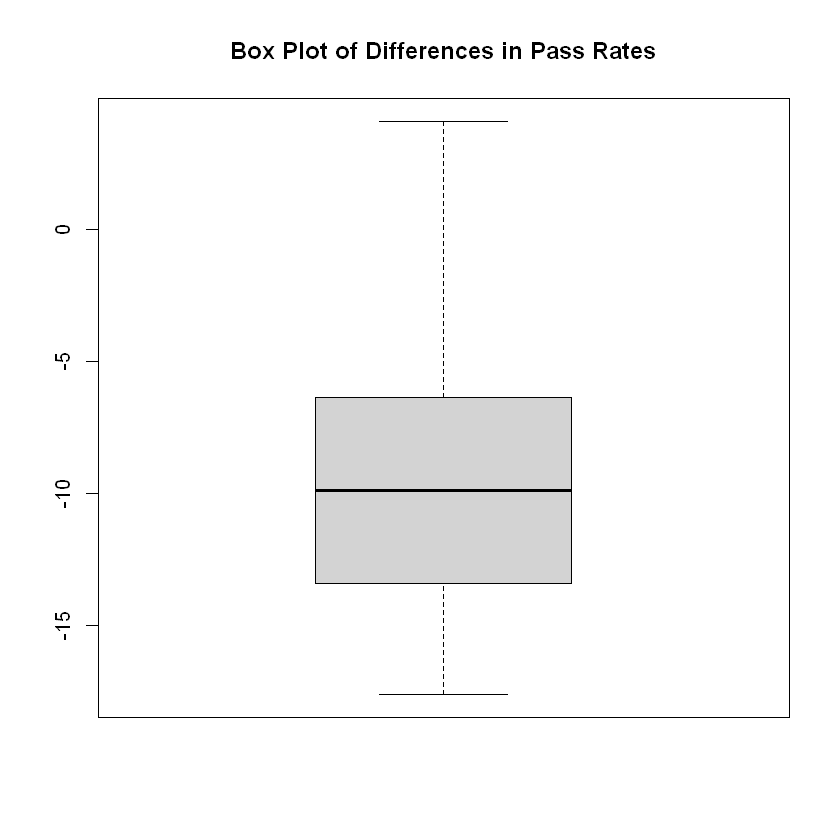

In [79]:
# Box-plot and Histogram to get a graphical idea of the distributional properties
# Combine L6 and U6 pass rate differences into a single vector
diff_pass_rate <- c(merged_data$diff_L6_Male, merged_data$diff_U6_Male)

# Create a box plot for the combined pass rate differences
boxplot(diff_pass_rate, main = "Box Plot of Differences in Pass Rates")



	Shapiro-Wilk normality test

data:  diff_pass_rate
W = 0.93024, p-value = 0.0987


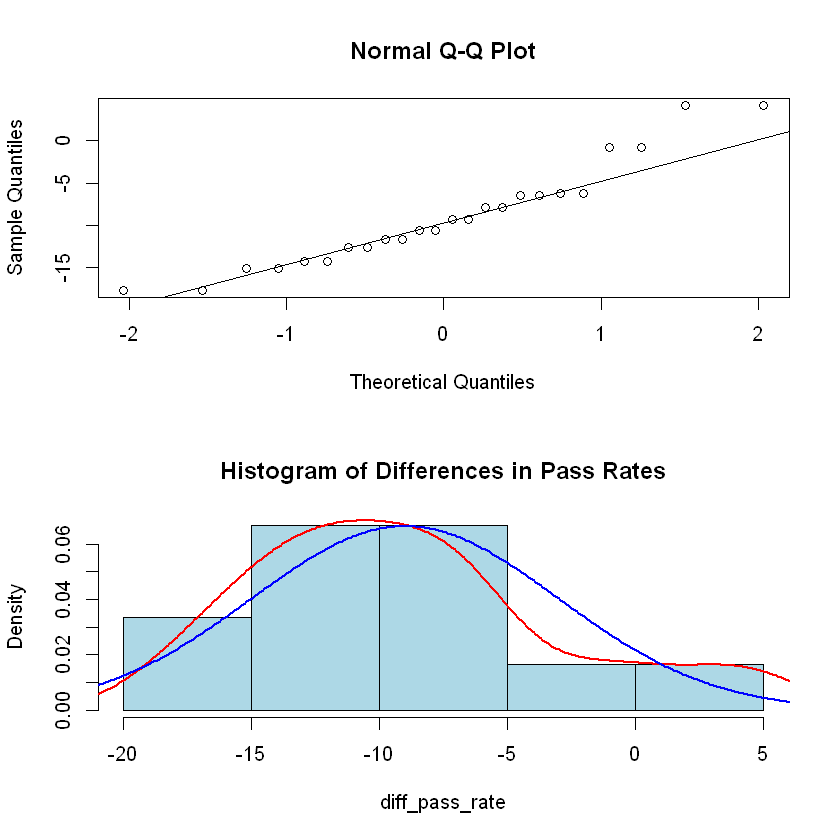

In [69]:
# Test for normality
# H0: Differences are from a normal population vs HA: Non-normal
shapiro.test(diff_pass_rate)

# Create a histogram for the combined pass rate differences
par(mfcol = c(2, 1))
qqnorm(diff_pass_rate)
qqline(diff_pass_rate)
hist(diff_pass_rate, freq = FALSE, col = "lightblue", main = "Histogram of Differences in Pass Rates")
d <- density(diff_pass_rate)
lines(d, lwd = 2, col = "red")
lines(d$x, dnorm(d$x, mean(diff_pass_rate), sd(diff_pass_rate)), lwd = 2, col = "blue")

In [75]:
#Findings:
#Basing our conclusion of only the p-value of the Shapiro-Wilk test (p-value = 0.0987), we find that we do not reject the null
#hypothesis of normality (i.e., we will assume that the difference data values are from a normally distributed population.)
#This conclusion is somewhat supported by the graphical output

In [77]:
t.test(diff_pass_rate, altrnative = "two.sided")


	One Sample t-test

data:  diff_pass_rate
t = -7.3563, df = 23, p-value = 1.754e-07
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -11.555227  -6.482777
sample estimates:
mean of x 
-9.019002 


In [78]:
# H0: There is no significant difference in the male pass rates before and after 2017 vs
# HA: There is a significant difference in the male pass rates before and after 2017

# Since the p-value of our test is 1.754e-07, which is less than the significance level of 0.05, we reject the null hypothesis
# that there is no significant difference in the male pass rates before and after 2017. Therefore, we assume there is a 
# significant difference in the male pass rates before and after 2017.
# This somewhat supports the visualisation of the male mean pass rates before and after 2017.

In [ ]:
"""
The data presented in this analysis covers enrollments up to 2023 and does not directly reflect the impact of the COVID-19
pandemic, which began in late 2019. It is important to consider that the pandemic may have had significant effects on enrollment
patterns globally, with various factors such as school closures, remote learning, and economic disruptions. 
Further analysis and data beyond 2023 would be necessary to assess the influence of the COVID-19 pandemic on enrollment trends 
"""